In [1]:
import os
import numpy as np
import pandas as pd
import graphlab as gl
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1475869631.log


This non-commercial license of GraphLab Create for academic use is assigned to thedavehogue@gmail.com and will expire on October 06, 2017.


In [2]:
ratings_path = os.path.join('data','ratings.dat')
submission_path = os.path.join('data','sample_submission.csv')
ratings = gl.SFrame(ratings_path, format='tsv')
submission = gl.SFrame(submission_path, format='csv')

Finished parsing file /Users/dave_hogue/data-science/dsi-denver5/week6/joke_recommender/data/ratings.dat

Parsing completed. Parsed 100 lines in 0.290478 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/dave_hogue/data-science/dsi-denver5/week6/joke_recommender/data/ratings.dat

Parsing completed. Parsed 1218325 lines in 0.544498 secs.

Finished parsing file /Users/dave_hogue/data-science/dsi-denver5/week6/joke_recommender/data/sample_submission.csv

Parsing completed. Parsed 100 lines in 0.10674 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file /Users/dave_hogue/data-science/dsi-denver5/week6/joke_recommender/data/sample_submission.csv

Parsing completed. Parsed 522169 lines in 0.17468 secs.

In [3]:
ratings

user_id,joke_id,rating
34888,111,-9.71875
49651,119,4.75
29027,137,2.625
25235,30,-2.4375
50499,19,2.1875
7300,51,9.3125
30219,9,2.3125
29443,134,3.1875
27069,128,1.21875
24450,120,10.0


In [4]:
pd_ratings = pd.Series(ratings['rating'])
pd_ratings.describe()

count    1.218325e+06
mean     1.700198e+00
std      5.285761e+00
min     -1.000000e+01
25%     -1.906250e+00
50%      2.312500e+00
75%      5.812500e+00
max      1.000000e+01
dtype: float64

Jokes appear to be rated on a scale from -10 to 10. We assume -10 would be an offensive, unfunny joke, and 10 is hilarity.

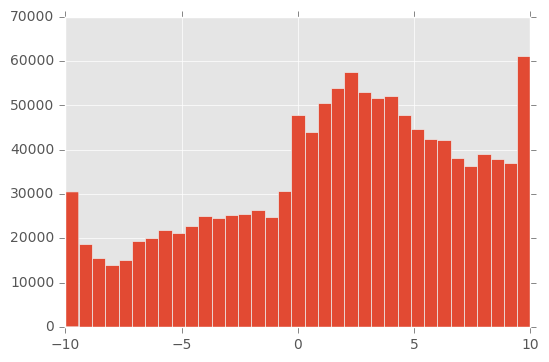

In [5]:
pd_ratings.hist(bins=35)

In [54]:
params = {'user_id': 'user_id', 'item_id' : 'joke_id',  'target': 'rating', 'solver' :['als', 'sgd', 'adagrad'], 
          'regularization' : [0,1e-4, 1e-8], 'max_iterations' : [40, 70, 100],
         'num_factors': [2, 5, 10]}

grid_search = gl.toolkits.model_parameter_search.grid_search.create(ratings,\
                                    gl.recommender.factorization_recommender.create, params)

[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Oct-07-2016-14-24-1900000' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Oct-07-2016-14-24-1900000' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: A job with name 'Model-Parameter-Search-Oct-07-2016-14-24-1900000' already exists. Renaming the job to 'Model-Parameter-Search-Oct-07-2016-14-24-1900000-fb5a1'.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Oct-07-2016-14-24-1900000-fb5a1' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Oct-07-2016-14-24-1900000-fb5a1' scheduled.
[INFO] graphlab.deploy.job: Validating job.
[INFO] graphlab.deploy.map_job: Validation complete. Job: 'Model-Parameter-Search-Oct-07-2016-14-24-1900001' ready for execution
[INFO] graphlab.deploy.map_job: Job: 'Model-Parameter-Search-Oct-07-2016-14-24

In [55]:
grid_search.get_results()

KeyboardInterrupt: 

In [56]:
grid_search.show()

AttributeError: 'ModelSearchJob' object has no attribute 'show'

In [31]:
rec_engine = gl.factorization_recommender.create(observation_data=ratings,
                                                     user_id="user_id",
                                                     item_id="joke_id",
                                                     target='rating',
                                                     solver='als',
                                                     side_data_factorization=False,
                                                     regularization=0,
                                                     max_iterations=25)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 1218325 observations with 50692 users and 141 items.

Data prepared in: 0.915914s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 0        |

| max_iterations               | Maximum Number of Iterations                     | 25       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 61us         | NA                     |

+---------+--------------+------------------------+

| 0       | 326.269ms    | 4.08966                |

| 1       | 646.996ms    | 3.32143                |

| 2       | 966.627ms    | 3.1797                 |

| 3       | 1.31s        | 3.12713                |

| 4       | 1.64s        | 3.09918                |

| 5       | 1.98s        | 3.08154                |

| 6       | 2.29s        | 3.06911                |

| 7       | 2.63s        | 3.05957                |

| 8       | 2.96s        | 3.05175                |

| 9       | 3.27s        | 3.04507                |

| 10      | 3.59s        | 3.03926                |

| 11      | 3.90s        | 3.03418                |

| 12      | 4.22s        | 3.02974                |

| 13      | 4.54s        | 3.02584                |

| 14      | 4.87s        | 3.02239                |

| 15      | 5.22s        | 3.01931                |

| 16      | 5.54s        | 3.01655                |

| 17      | 5.85s        | 3.01405                |

| 18      | 6.17s        | 3.01178                |

| 19      | 6.49s        | 3.00971                |

| 20      | 6.84s        | 3.0078                 |

| 21      | 7.16s        | 3.00604                |

| 22      | 7.48s        | 3.0044                 |

| 23      | 7.81s        | 3.00288                |

| 24      | 8.13s        | 3.00147                |

| FINAL   | 8.13s        | 3.00147                |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [35]:
predictions = np.array(rec_engine.predict(submission))
pos_mask = np.where(predictions > 10)[0]
neg_mask = np.where(predictions < -10)[0]
predictions[pos_mask] = 10
predictions[neg_mask] = -10
print predictions.max(), predictions.min()

10.0 -10.0


(-20, 20)

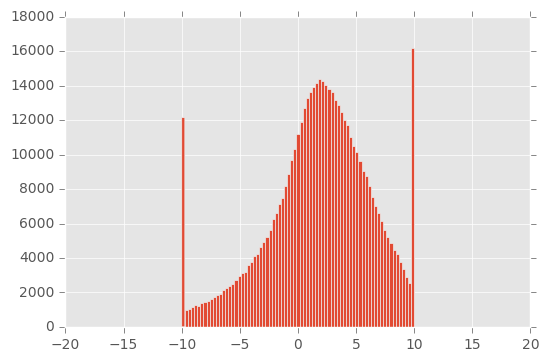

In [36]:
predictions
pd.Series(predictions).hist(bins=75)
plt.xlim(-20, 20)

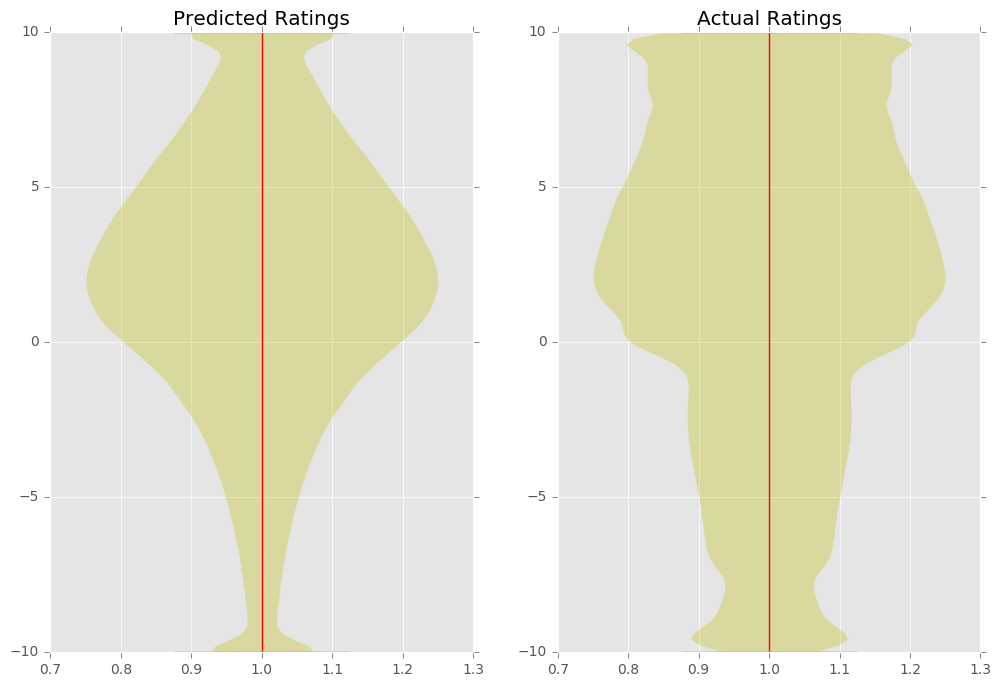

In [37]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(1,2,1)
ax1.violinplot(predictions)
ax1.set_title('Predicted Ratings')
ax2 = fig.add_subplot(1,2,2)
ax2.violinplot(pd_ratings)
ax2.set_title('Actual Ratings')

In [38]:
def get_recs(predictions, submission):
    sample_sub = pd.read_csv(submission)
    for_prediction = gl.SFrame(sample_sub)
    sample_sub.rating = predictions
    sample_sub.to_csv("data/test_ratings.csv", index=False)

In [39]:
get_recs(predictions, submission_path)